 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [107]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [14]:
# Reading whale returns
whl_csv = Path("Resources/whale_returns.csv")
whl_rtns = pd.read_csv(
    whl_csv, 
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True)
whl_rtns.sort_index(
    ascending = True, 
    inplace = True)
whl_rtns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [15]:
# Count nulls
print(whl_rtns.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [16]:
# Drop nulls
whl_rtns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [17]:
# Reading algorithmic returns
algo_csv = Path("Resources/algo_returns.csv")
algo_rtns = pd.read_csv(
    algo_csv, 
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True)
algo_rtns.sort_index(
    ascending = True, 
    inplace = True)
algo_rtns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [18]:
# Count nulls
print(algo_rtns.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [19]:
# Drop nulls
algo_rtns.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [61]:
# Reading S&P 500 Closing Prices
snp_csv = Path("Resources/sp500_history.csv")
snp_clsprs = pd.read_csv(
    snp_csv, 
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True)
snp_clsprs.sort_index(
    ascending = True, 
    inplace = True)
snp_clsprs.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [62]:
# Check Data Types
snp_clsprs.dtypes

Close    object
dtype: object

In [63]:
# Fix Data Types
snp_clsprs["Close"]= snp_clsprs["Close"].str.replace('$','').astype("float")
snp_clsprs.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [64]:
# Calculate Daily Returns
snp_rtns = snp_clsprs.pct_change()
snp_rtns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [65]:
# Drop nulls
snp_rtns.dropna(inplace = True)
snp_rtns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [66]:
# Rename `Close` Column to be specific to this portfolio.
snp_rtns.rename(columns = {"Close":"S&P 500"}, inplace = True)
snp_rtns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [67]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
main_df = pd.concat([whl_rtns, algo_rtns,snp_rtns], axis = "columns",join = "inner")
main_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

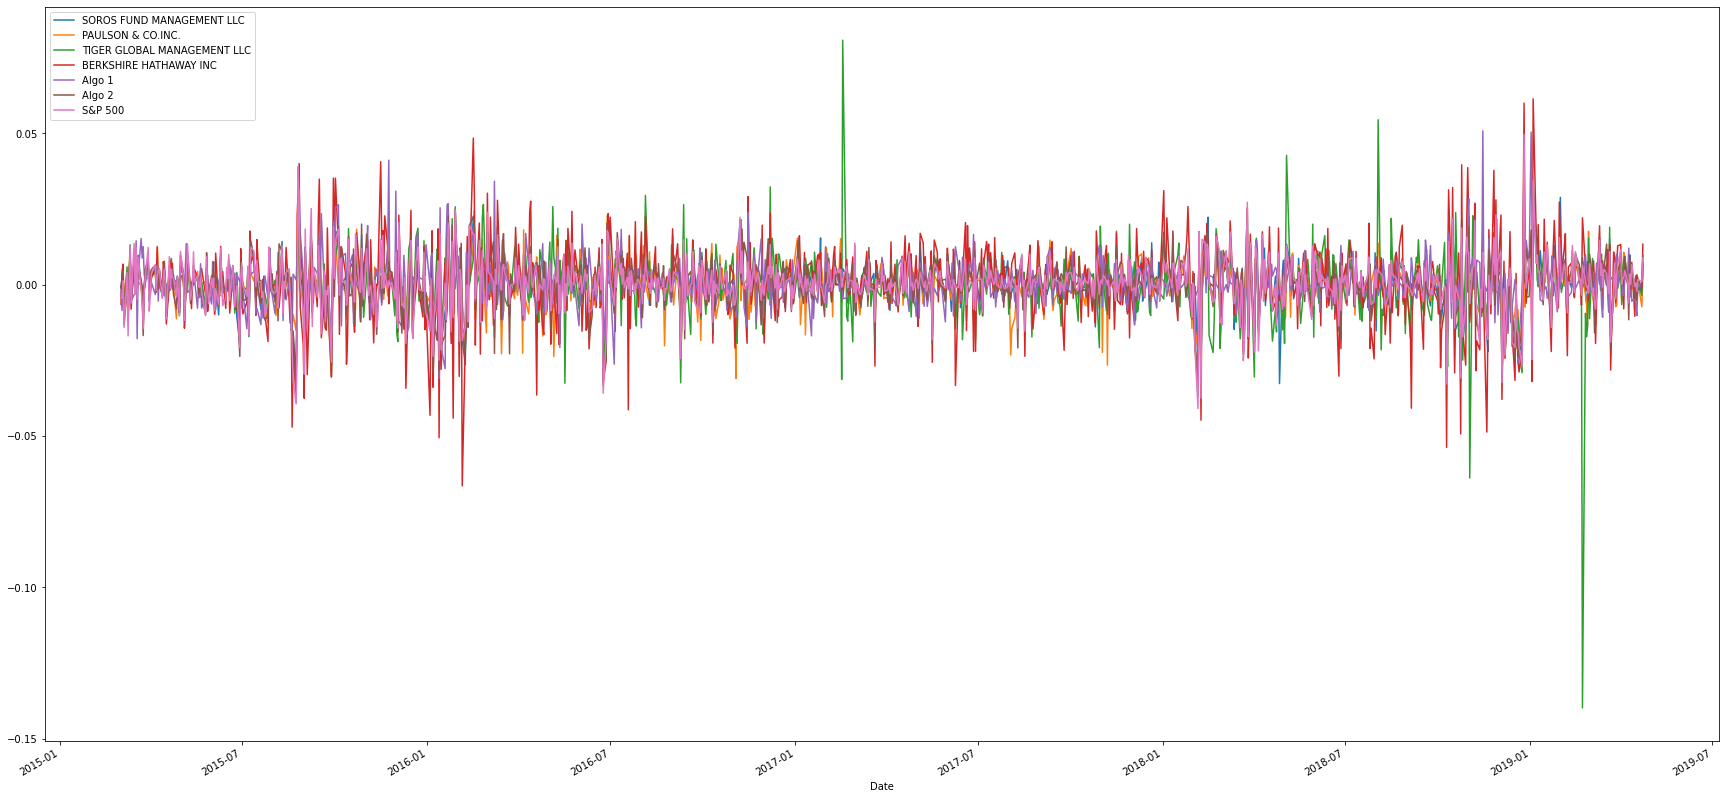

In [73]:
# Plot daily returns of all portfolios
main_df.plot(figsize = (30,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

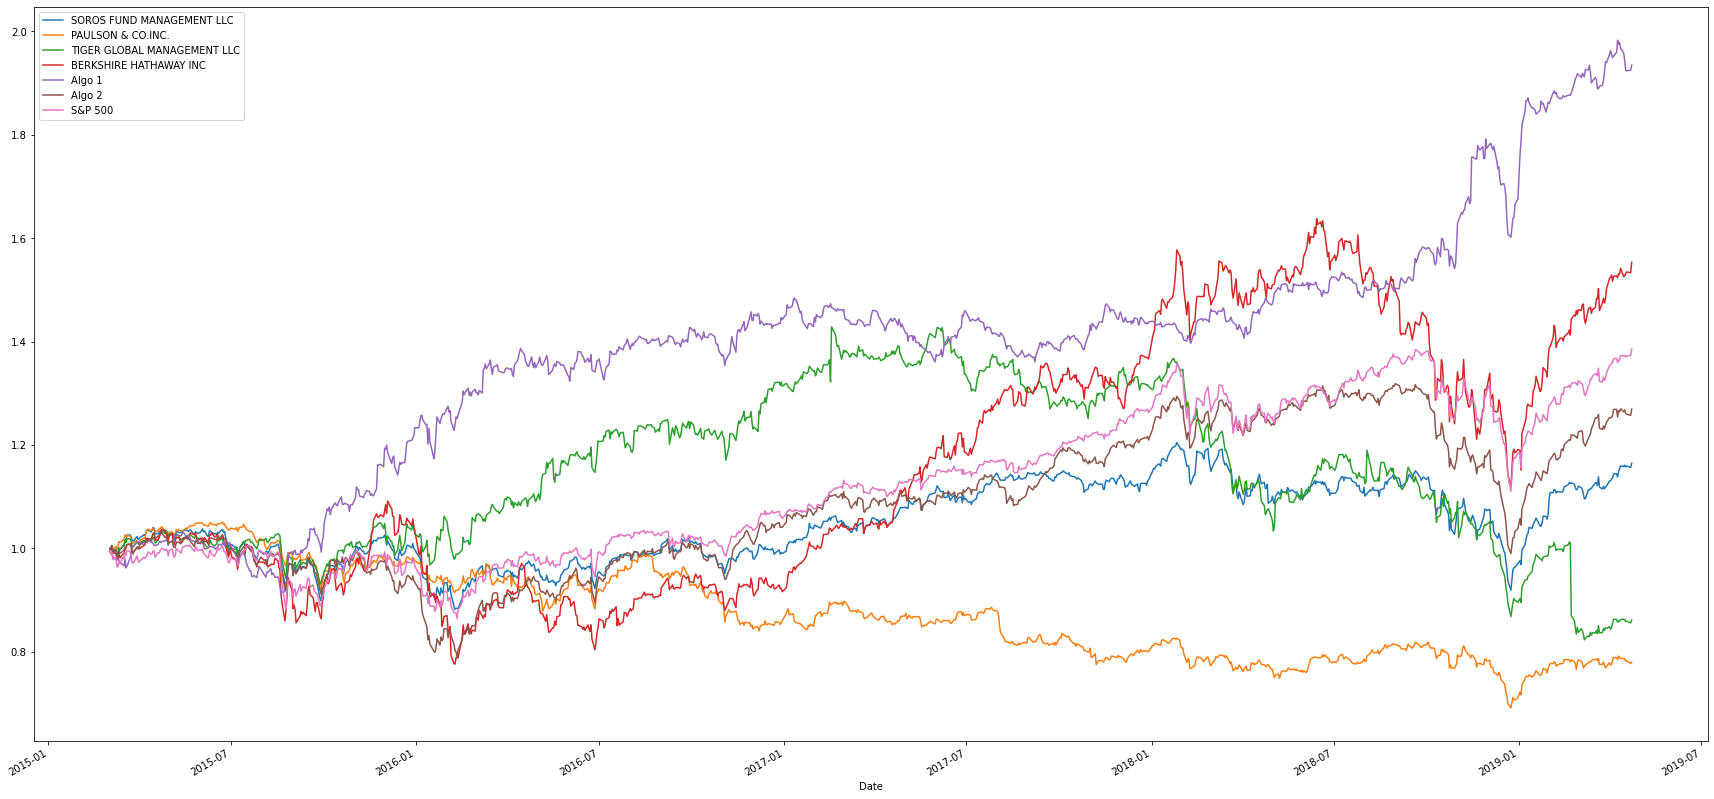

In [75]:
# Calculate cumulative returns of all portfolios
cum_main_df = (1+ main_df).cumprod()
cum_main_df.head()
# Plot cumulative returns
cum_main_df.plot(figsize = (30,15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

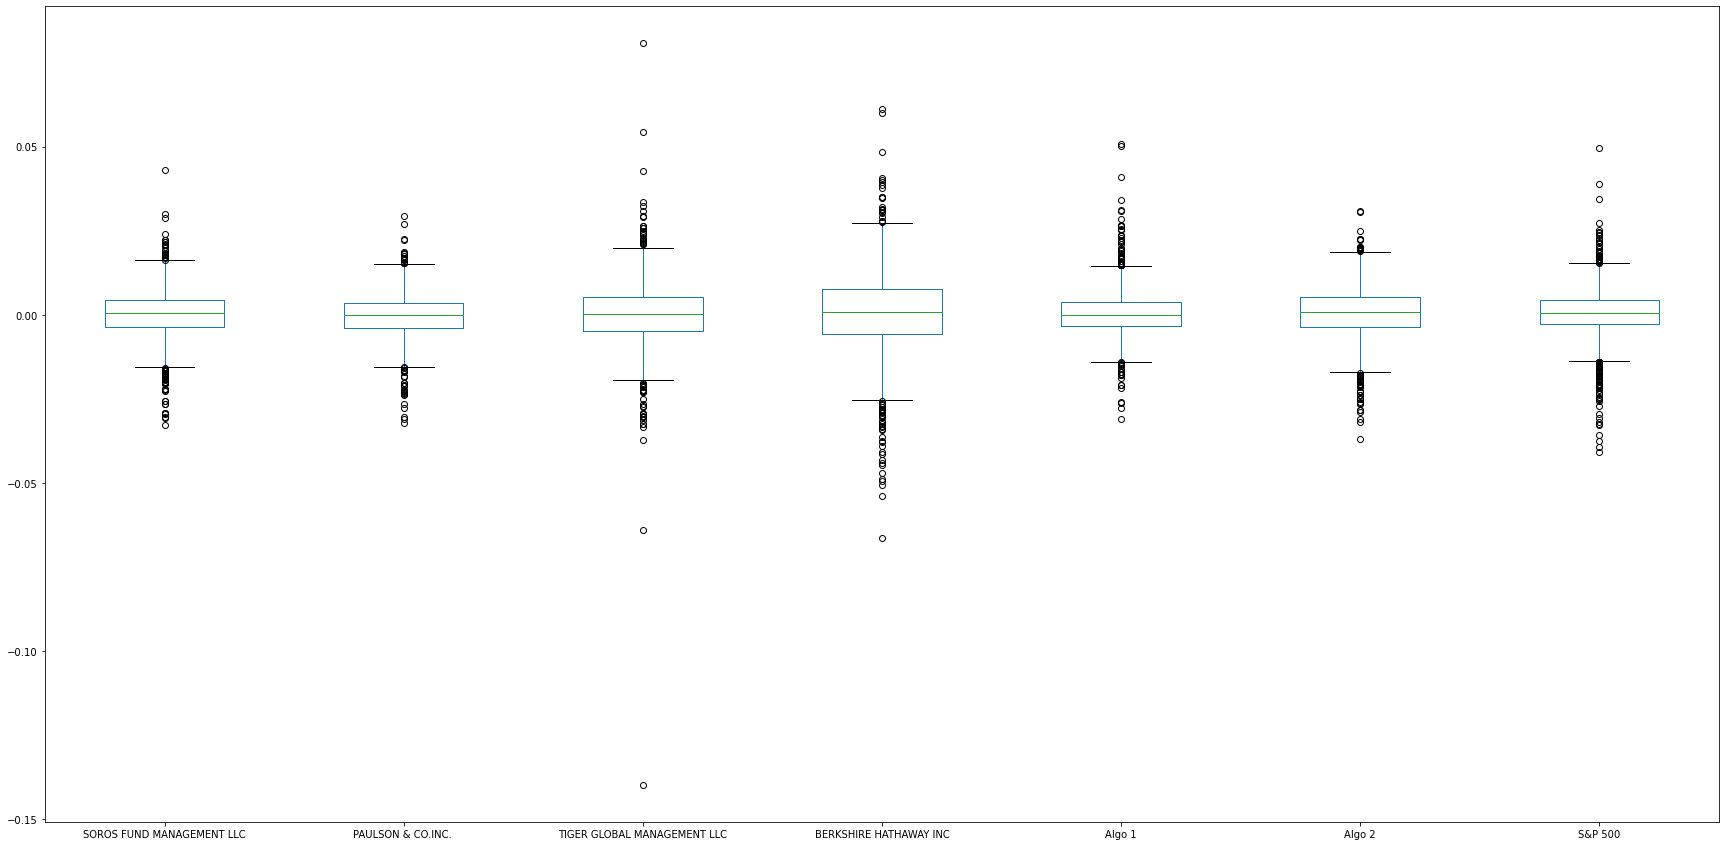

In [76]:
# Box plot to visually show risk
main_df.plot(kind = "box", figsize = (30,15))

### Calculate Standard Deviations

In [78]:
# Calculate the daily standard deviations of all portfolios
main_df_SD = pd.DataFrame(main_df.std())
print(main_df_SD)

                                    0
SOROS FUND MANAGEMENT LLC    0.007895
PAULSON & CO.INC.            0.007023
TIGER GLOBAL MANAGEMENT LLC  0.010894
BERKSHIRE HATHAWAY INC       0.012919
Algo 1                       0.007620
Algo 2                       0.008342
S&P 500                      0.008554


### Determine which portfolios are riskier than the S&P 500

In [81]:
# Calculate  the daily standard deviation of S&P 500
#main_df_SD[-
# Determine which portfolios are riskier than the S&P 500
Riskier_port = main_df_SD[main_df_SD[0] > main_df_SD.loc["S&P 500", 0]]
print(Riskier_port)

                                    0
TIGER GLOBAL MANAGEMENT LLC  0.010894
BERKSHIRE HATHAWAY INC       0.012919


### Calculate the Annualized Standard Deviation

In [82]:
# Calculate the annualized standard deviation (252 trading days)
annualized_SD = main_df_SD*np.sqrt(252)
print(annualized_SD)

                                    0
SOROS FUND MANAGEMENT LLC    0.125335
PAULSON & CO.INC.            0.111488
TIGER GLOBAL MANAGEMENT LLC  0.172936
BERKSHIRE HATHAWAY INC       0.205077
Algo 1                       0.120967
Algo 2                       0.132430
S&P 500                      0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

             S&P 500
Date                
2015-03-31  0.009105
2015-04-01  0.009095
2015-04-02  0.009114
2015-04-06  0.009246
2015-04-07  0.008707
...              ...
2019-04-16  0.006498
2019-04-17  0.006537
2019-04-18  0.006470
2019-04-22  0.006094
2019-04-23  0.004325

[1023 rows x 1 columns]


<AxesSubplot:xlabel='Date'>

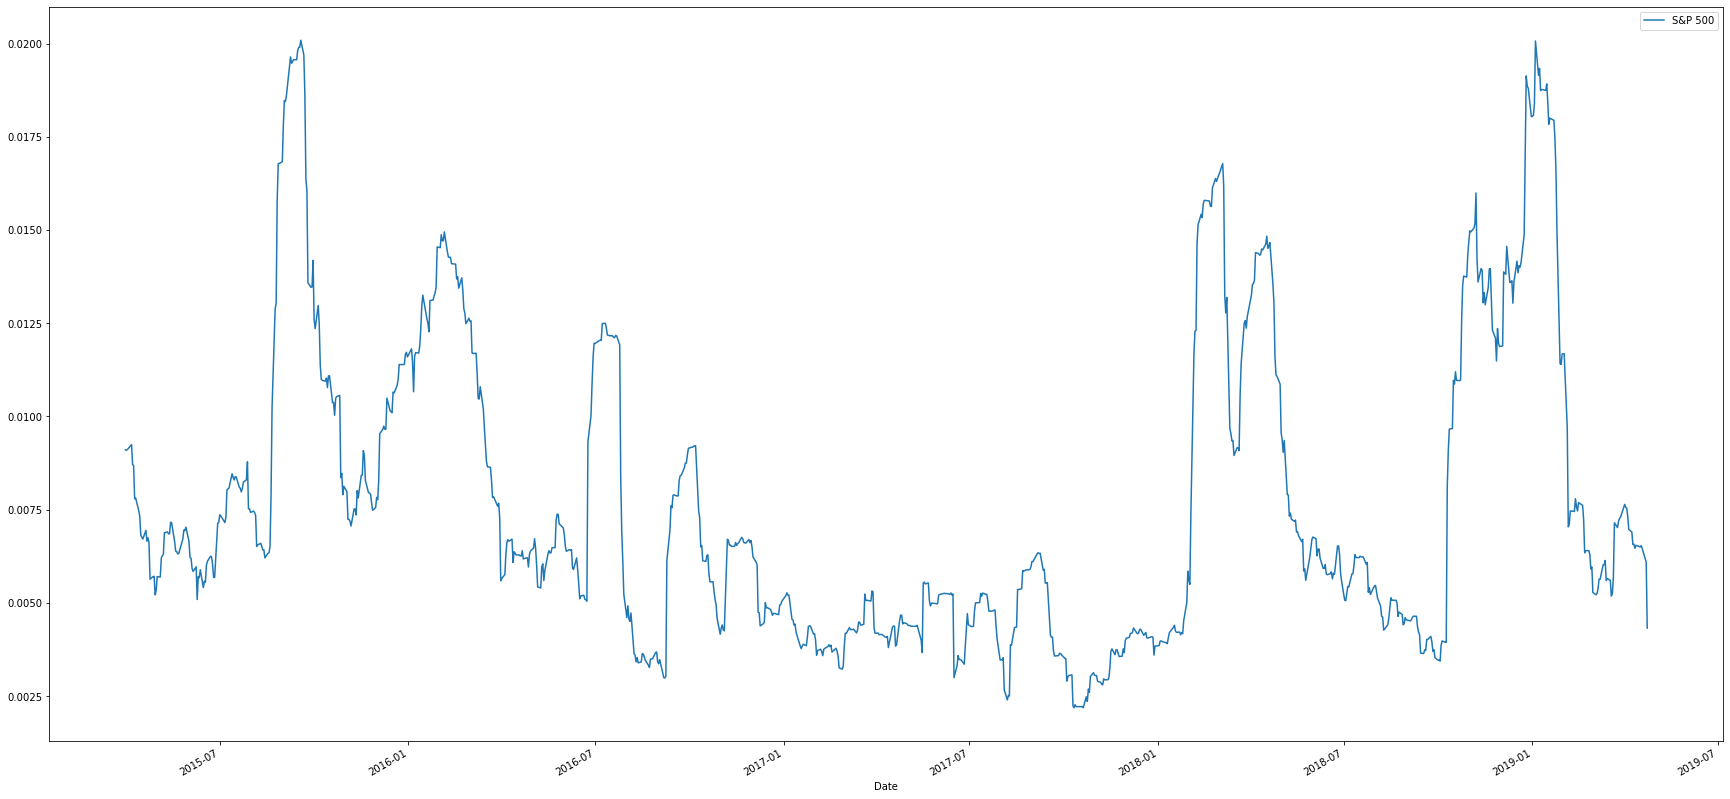

In [86]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_SD = main_df[["S&P 500"]].rolling(window = 21).std().dropna()
print(rolling_SD)
# Plot the rolling standard deviation
rolling_SD.plot(figsize = (30,15))

### Calculate and plot the correlation

<AxesSubplot:>

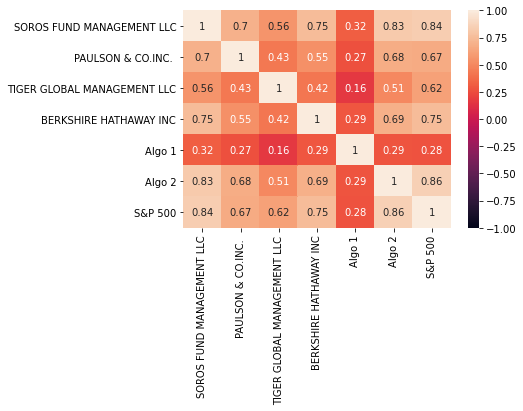

In [129]:
# Calculate the correlation
corr_main_df = main_df.corr()
# Display de correlation matrix
sns.heatmap(corr_main_df,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

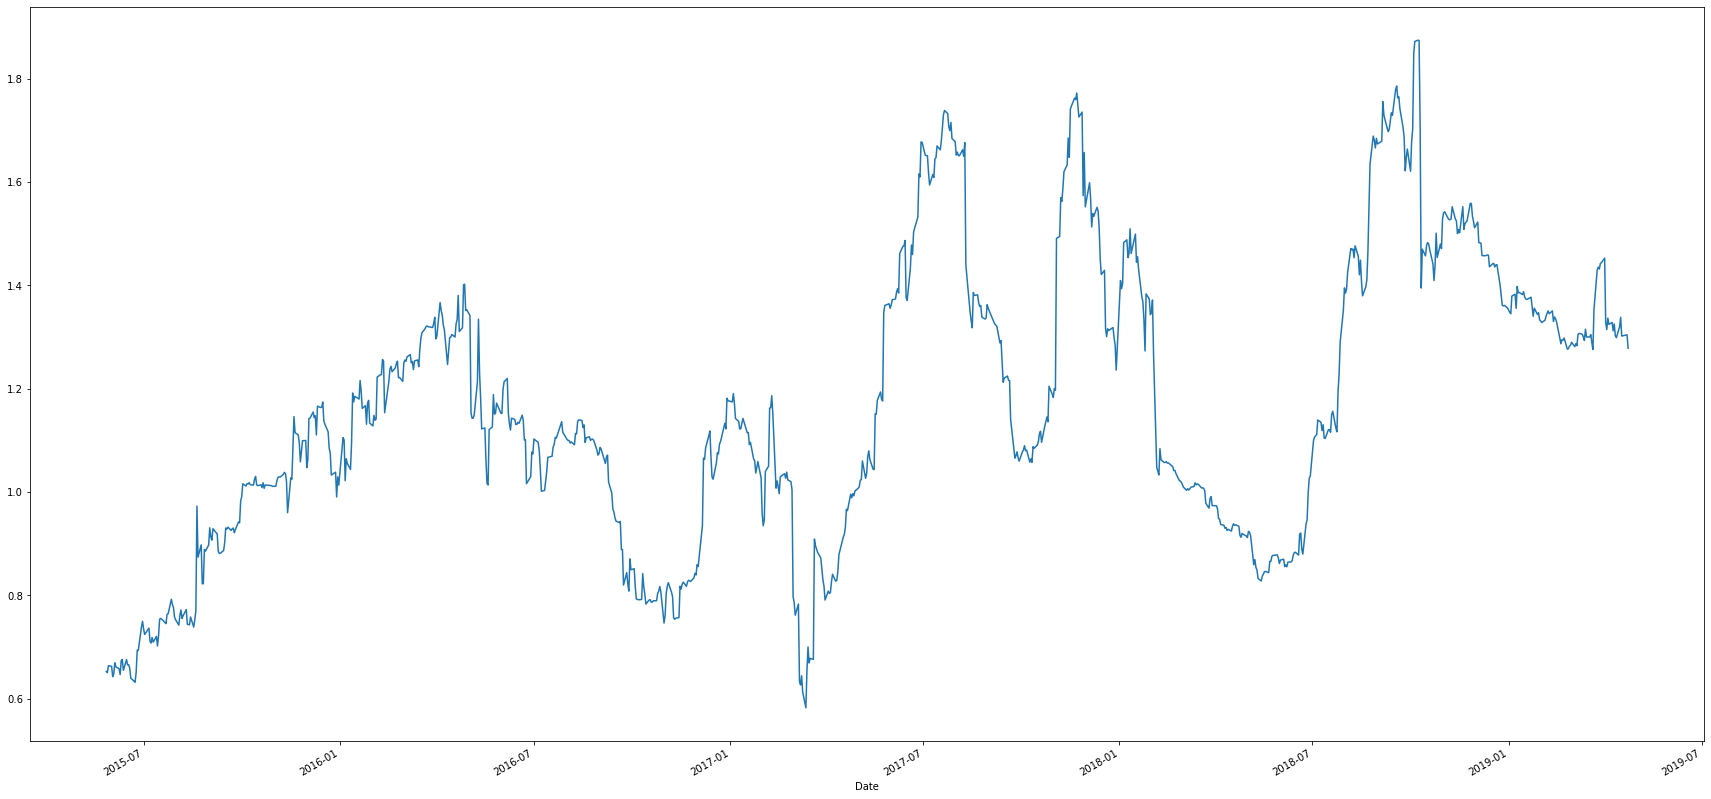

In [121]:
# Calculate covariance of a single portfolio
cov_main_df = main_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(main_df['S&P 500'])
# Calculate variance of S&P 500
var_main_df = main_df['S&P 500'].rolling(window=60).var()
# Computing beta
beta_main_df = cov_main_df / var_main_df
# Plot beta trend
beta_main_df.plot(figsize = (30,15))

#Algo 2 has best correlation to S&P 500

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

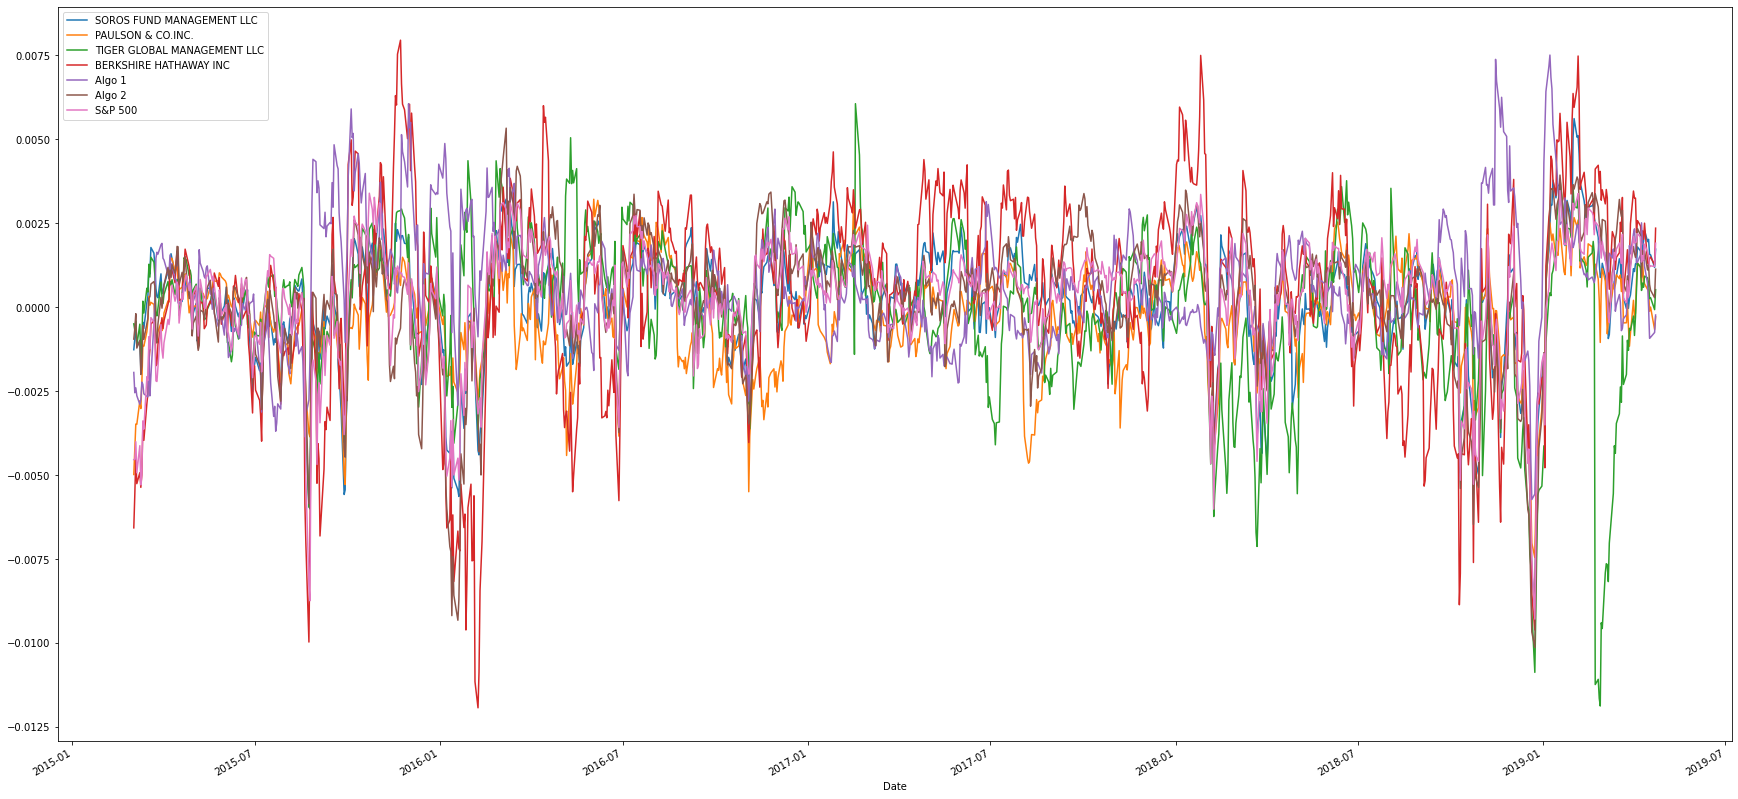

In [118]:
# Use `ewm` to calculate the rolling window
ewm_main_df = main_df.ewm(span = 21, adjust = False).mean()
ewm_main_df.plot(figsize = (30,15))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [122]:
# Annualized Sharpe Ratios
main_df_SR = main_df.mean()*252/(main_df.std()*np.sqrt(252))
print(main_df_SR)

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64


<AxesSubplot:>

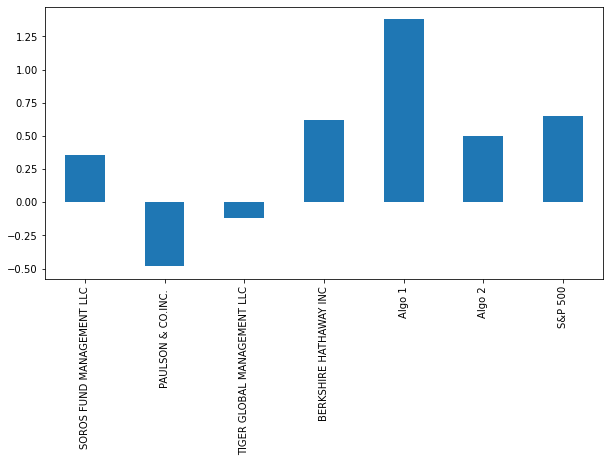

In [127]:
# Visualize the sharpe ratios as a bar plot
main_df_SR.plot(kind = "bar", figsize = (10,5))

In [ ]:
### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

#Write your answer here!
#Algo 1 outperformed both the market (S&P 500) and the whales portfolios. Algo 2 fell below the market and Berkshire Hathaway Inc while outperforming others

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [145]:
# Reading data from 1st stock
GOOG_stk = pd.read_csv(
    Path("Resources/goog_historical.csv"), 
    index_col="Trade DATE", 
    parse_dates = True, 
    infer_datetime_format= True)
GOOG_stk.rename(
    columns = {"NOCP":"GOOG"}, 
    inplace = True)
GOOG_stk.drop('Symbol', 
    inplace = True,
    axis=1)
GOOG_stk.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [146]:
# Reading data from 2nd stock
AAPL_stk = pd.read_csv(
    Path("Resources/aapl_historical.csv"), 
    index_col="Trade DATE", 
    parse_dates = True, 
    infer_datetime_format= True)
AAPL_stk.rename(
    columns = {"NOCP":"AAPL"}, 
    inplace = True)
AAPL_stk.drop('Symbol', 
    inplace = True,
    axis=1)
AAPL_stk.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [147]:
# Reading data from 3rd stock
COST_stk = pd.read_csv(
    Path("Resources/cost_historical.csv"), 
    index_col="Trade DATE", 
    parse_dates = True, 
    infer_datetime_format= True)
COST_stk.rename(
    columns = {"NOCP":"COST"}, 
    inplace = True)
COST_stk.drop('Symbol', 
    inplace = True,
    axis=1)
COST_stk.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [152]:
# Combine all stocks in a single DataFrame
stks_df = pd.concat((GOOG_stk, AAPL_stk, COST_stk), axis=1, join= "inner")
stks_df.sort_index(ascending = True, inplace = True)
stks_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [ ]:
# Reset Date index
stks_df.sort_index(ascending = True, inplace = True)

In [ ]:
# Reorganize portfolio data by having a column per symbol
stks_df.head()

In [153]:
# Calculate daily returns
stks_df_rtns = stks_df.pct_change()
# Drop NAs
stks_df_rtns.dropna(inplace = True)
# Display sample data
stks_df_rtns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [154]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stks_df_wts = stks_df.dot(weights)
port_rtns = stks_df_wts.pct_change()
port_rtns.dropna(inplace = True)
# Display sample data
port_rtns.head()

Trade DATE
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
2018-05-18   -0.009248
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [157]:
# Join your returns DataFrame to the original returns DataFrame
comp_port_rtns = pd.concat((port_rtns,main_df), axis = 1, join = "inner")
comp_port_rtns.rename(columns = {0:"My_Portfolio"}, inplace = True)
comp_port_rtns

,My_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [158]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comp_port_rtns.dropna(inplace=True)
comp_port_rtns

,My_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [161]:
# Calculate the annualized `std`
comp_port_SD = (pd.DataFrame(comp_port_rtns.std()).rename(columns = {0:"SD"}) * np.sqrt(252))
comp_port_SD

,SD
My_Portfolio,0.228804
SOROS FUND MANAGEMENT LLC,0.146675
PAULSON & CO.INC.,0.116732
TIGER GLOBAL MANAGEMENT LLC,0.232531
BERKSHIRE HATHAWAY INC,0.247155
Algo 1,0.133704
Algo 2,0.139556
S&P 500,0.152054


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

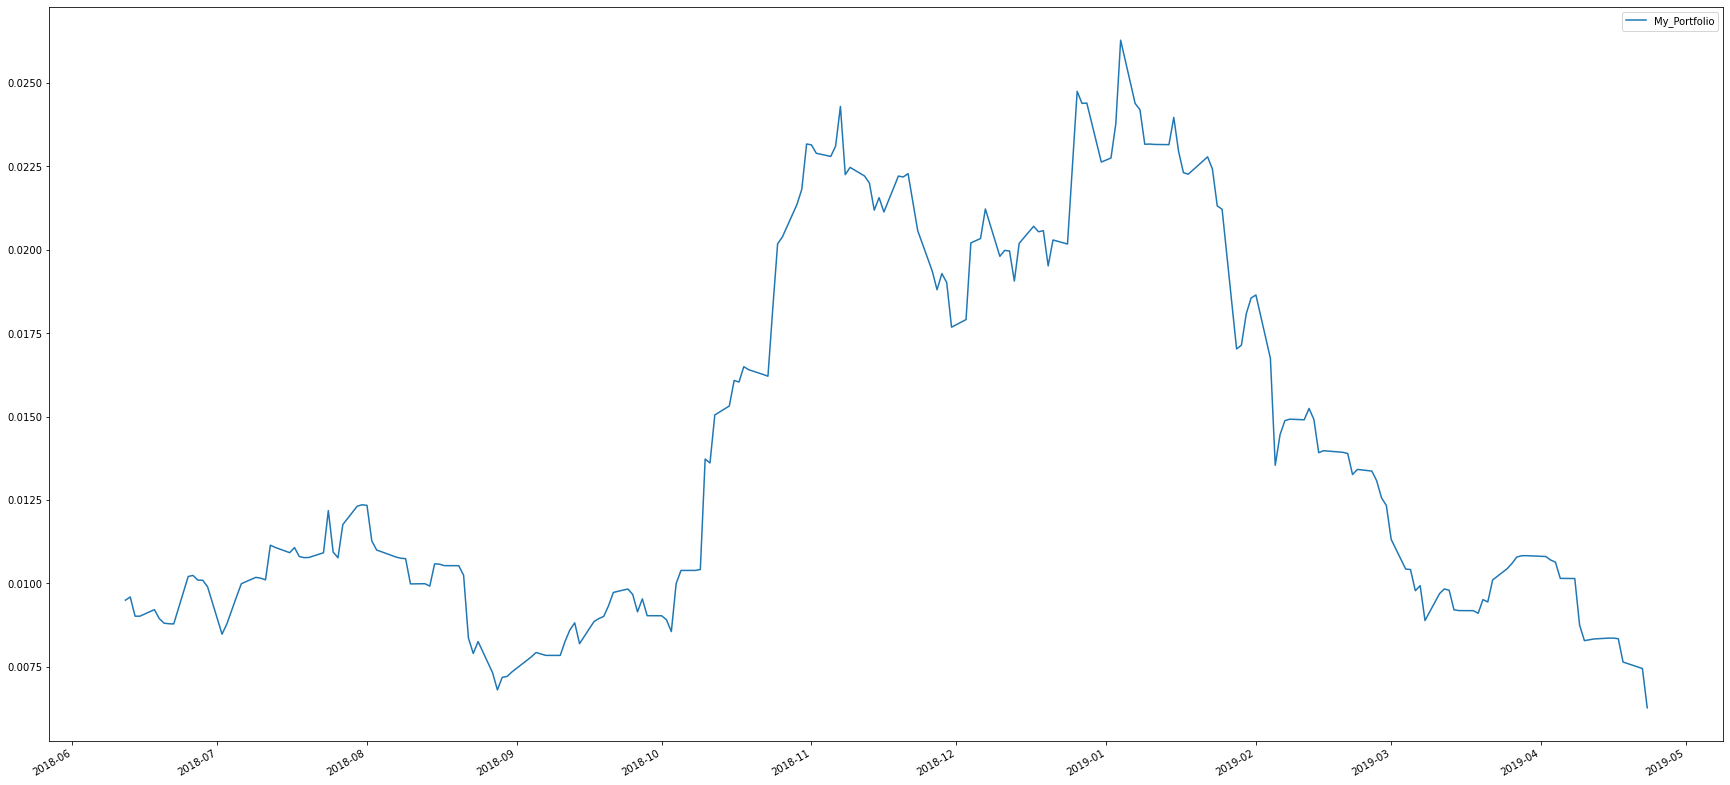

In [164]:
# Calculate rolling standard deviation
roll_port_SD = comp_port_rtns[["My_Portfolio"]].rolling(window = 21).std()
# Plot rolling standard deviation
roll_port_SD.plot(figsize = (30,15))

### Calculate and plot the correlation

<AxesSubplot:>

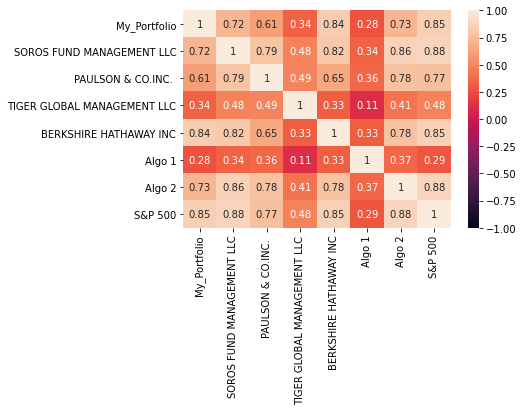

In [167]:
# Calculate and plot the correlation
corr_comp_port = comp_port_rtns.corr()
sns.heatmap(corr_comp_port,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

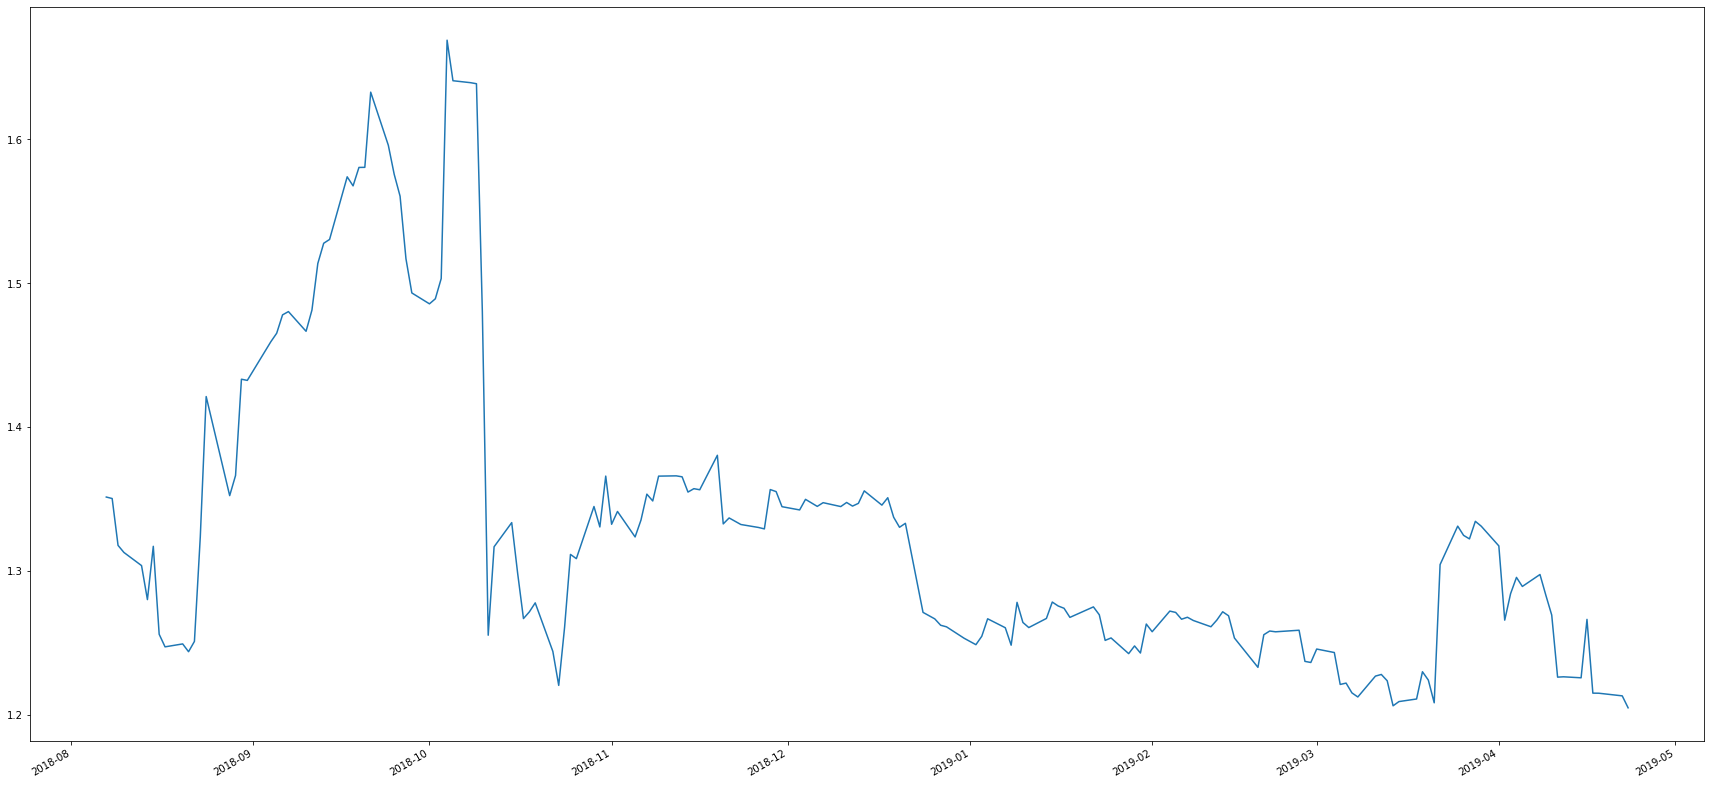

In [168]:
# Calculate and plot Beta
cov_comp_port = comp_port_rtns['My_Portfolio'].rolling(window=60).cov(comp_port_rtns['S&P 500'])
var_comp_port = comp_port_rtns['S&P 500'].rolling(window=60).var()
beta_comp_port = cov_comp_port / var_comp_port
beta_comp_port.plot(figsize=(30,15))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [171]:
# Calculate Annualzied Sharpe Ratios
SR_comp_port = comp_port_rtns.mean()*252/(comp_port_rtns.std()*np.sqrt(252))

<AxesSubplot:>

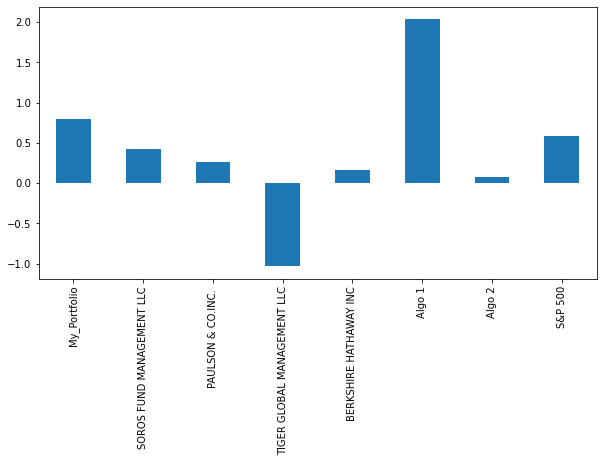

In [172]:
# Visualize the sharpe ratios as a bar plot
SR_comp_port.plot(kind = 'bar', figsize = (10,5))

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio did well, only trailing behind Algo 1